# 単層ニューラルネットワークの実装

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

### 適当なデータを作る

原点中心に半径rの円に入る点のデータを１とし、それ以外を０とするトイデータを作ります。  
球形は明らかに非線形なので、何となく今までのモデルででは難しそうななことがわかります。  
教師データを作成するためにまずは方程式を解きます。　　

円の方程式は$X^2+y^2=r^2$  
今回は簡単に$r=1$とします。  
この時$x^2+y^2<=1$の時円の中にあると判定します。

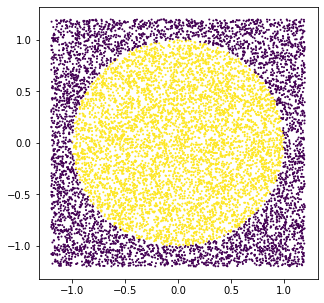

X.shape => (10000, 2)
y.shape => (10000,)


In [5]:
X = np.random.uniform(-1.2,1.2,(10000,2))
y = np.sum(X**2,axis=1)<1
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=1)
plt.show()
print("X.shape =>",X.shape)
print("y.shape =>",y.shape)

## 訓練データとテストデータに分ける

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

## 必要そうなクラスや関数リストをまとめておく

**一般的に必要なLayer Class**
- 全結合出力層(Affin)
 - 回帰
 - 二値分類
 - 多値分類

### Optimizerのクラス群
- SGD
- Adagrad

発展的なOptimizer
- Adam(多くの場面ではこれが使われています)
- Eve
- 最近提案されたやつ(Adaboundsとか？)

## 実装していく前に

ニューラルネットワークは一般化線形モデルの多層化と同値です。
一般化線形モデルとは、今までにやって来た線形回帰やロジスティック分類を総称したものです。数式上では  
$$
y=g(\beta_0 + f_1(x_1) + f_2(x_2) + f_3(cx_3))
$$  
と表わすことができるモデルのことです。一般にこれは一般化加法モデルとも呼ばれますが、関数$f_i$を特徴量抽出の関数だとみなすことで  
$$
y=f(\beta_0 + ax_1 + bx_2 + cx_3)
$$  
という簡単なモデルまで落とし込めます。
上式の$f$がsigmoidやtanh、さらにはReLUになっており、出力を複数に分岐させ、それを次の層の入力（特徴量）とするモデルをニューラルネットワークといいます。

**出力を分岐**  
線形回帰モデルではa,b,c等を係数にして、一次元行列としていましたが、これを二次元行列にすることで出力を複数に分けることができます。以下に入力次元n、出力次元がmとなるモデルを書きます。

出力$y$、入力$X$、重み$W$、バイアスは以下

$$
\
y = \left[
  \begin{array}{ccc}
    y_1 \\
    y_2 \\
    \vdots \\
    y_m
  \end{array}
    \right]
\
,
\
W = \left[
  \begin{array}{ccc}
    w_{11} & w_{12} & \cdots & w_{1n} \\
    w_{21} & w_{22} & \cdots & w_{2n} \\
    \vdots & \vdots & \ddots & \vdots \\
    w_{m1} & w_{m2} & \cdots & w_{mn}
  \end{array}
    \right]
\
,  \\
\
X = \left[
  \begin{array}{ccc}
    x_{1} \\
    x_{2} \\
    \vdots \\
    x_{n}
  \end{array}
    \right]
\
,
\
b = \left[
  \begin{array}{ccc}
    b_{1} \\
    b_{2} \\
    \vdots \\
    b_{n}
  \end{array}
    \right]
\
$$

で表すことができ、$y=WX+b$で記述できる。バッチサイズも考慮する場合には注意する必要がありますが、基本的には$y$と$X$の次元が変わるだけです。

以上を踏まえて実装していきましょう。

## 実装の手順

- W,b行列の初期化  
- (中間層)活性化関数の実装  
- (出力層)活性化関数の実装
- 交差エントロピー誤差の実装
- それぞれのバックプロパゲーション実装

Deepに向けて、よりアーキテクチャを変更できるように書きたい場合はクラスで実装すると良い。

初期値を決定するための関数を作成しましょう(問題１)

In [12]:
#W,b行列の初期化
def init_Wb():
    return

forwardプロパゲーションは無視して実装していきましょう。(問題２)

In [18]:
#Sigmoid:中間層
def sigmoid_forward(X):
    return 1/(1+exp(-X))

#Tanh:中間層
def tanh_forward(X):
    return (exp(X)-exp(-X))/(exp(X)+exp(-X))

#Softmax:多値分類
def softmax_forward():
    return

### ここで一度テスト

例えば
```python
X = np.array([[1,1],[2,2],[3,3]])#バッチサイズ３,入力サイズ２
w = np.array([[1,2],[3,4],[5,6]])#出力サイズ３,入力サイズ２
```

の出力ｙの形状が(3,3)になっていれば正解です。

バックプロパゲーションの実装の時戻ってきましょう。(問題４)

In [19]:
#simoid:
def sigmoid_backward():
    return

#tanhの微分を使う
def tan_backward():
    return

#softmaxの微分を使う
def softmax_backward():
    return

交差エントロピーの計算(問題３)

In [ ]:
def cross_entropy():
    return

バックプロパゲーションの実装(問題４)を行う前に微分や連鎖率についてまとめなおしておきましょう。  

まずは出力層を考えます。出力層のノード $i$ への入力を $\lambda_i$ とし、損失関数 $E$ からパラメータを更新したいので、偏微分の連鎖律を考えると、

\begin{align}
\frac{\partial E}{\partial w_{ij}}=\frac{\partial E}{\partial \lambda_i} \frac{\partial \lambda_i}{\partial w_{ij}}
\end{align}
となります。

自然に$\frac{\partial E}{\partial \lambda_i}$と$\frac{\partial \lambda_i}{\partial w_{ij}}$を導出すればいいことになります。


多値分類の場合でそれぞれの微分を考えていきましょう。多値分類の場合交差エントロピーを使うので、


\begin{align}
\frac{\partial E}{\partial \lambda_i} &= \frac{\partial}{\partial \lambda_i}\Bigr(-\sum^{n}_{j=1} t_j \times log(y_j)\Bigl)\\
&= -\sum^{n}_{j=1} {\frac{t_j}{y_j}\frac{\partial y_j}{\partial \lambda_i}}  \\
&= y_i - t_i
\end{align}



となります。ただし、
\begin{align}　
t_i = 
\begin{cases}
    1  ,(正解時)  \\
    0  ,(不正解時)
\end{cases}　　,
y_i = \frac{\lambda_i}{\sum^{n}_{j=1}{\exp(\lambda_j)}}
\end{align}
です。

\begin{align}
\frac{\partial \lambda_i}{\partial w_{ij}} &= \frac{\partial}{\partial w_{ij}}\Bigl(\sum w_{ij}x_i\Bigr)  \\
&= x_j
\end{align}

従って、パラメータの更新は

\begin{align}
w^{(k+1)}_{ij} = w^{(k)}_{ij} - \alpha(y_i - t_i)x_j
\end{align}
すなわち、
\begin{align}
w^{(k+1)} = w^{(k)} - \alpha(y-t)x^T
\end{align}
で行うことができます。

中間層での場合を考えます。中間層へのあるノード $i$ への入力を $\mu_i$とすると
\begin{align}
\frac{\partial E}{\partial w} &= \frac{\partial E}{\partial \mu} \frac{\partial \mu}{\partial w}  \\
&= \frac{\partial E}{\partial x} \frac{\partial x}{\partial \mu} \frac{\partial \mu}{\partial w}
\end{align}

最後の出力を用いて推定させましょう。

NNの簡単なモデルを作成しましょう。今まで作ってきた関数を呼び出してニューラルネットモデルを作成しましょう。  
Lossを保存させて、プロットできるようにもしておきましょう。(課題６)

In [ ]:
def nn_model():
    return

上記モデルを実際に動かして学習させましょう(問題６)

最初に書いてある円のモデルは簡単に学習できるので、まずはこれが学習できているか動かして見るといいと思います。

学習曲線を見て学習がどのように進んでいるか見てください。(問題７)

誤分類してしまった画像を出力して、どのような画像が誤分類されているか検討してみましょう。(アドバンス課題７)